| **Inicio** | **atrás 2** | **Siguiente 4** |
|----------- |-------------- |---------------|
| [🏠](../../../README.md) | [⏪](./2.ALGORITMOS_DE_CLASIFICACION.ipynb)| [⏩](./4.METODOS_AVANZADOS_PARA_MACHINE_LEARNING.ipynb)|

# **3. ALGORITMOS DE CLUSTERING**

## **Métricas para evaluar el rendimiento de los algoritmos de agrupamiento**

Las métricas para evaluar el rendimiento de los algoritmos de agrupamiento se utilizan para medir qué tan bien el algoritmo ha agrupado los datos y cómo se compara con la estructura de agrupamiento real (si está disponible). A continuación, se presentan algunas métricas comunes utilizadas para evaluar el rendimiento de los algoritmos de agrupamiento, junto con ejemplos de código Python y gráficas.

* **Índice de Silueta:**

El índice de silueta es una métrica que cuantifica qué tan bien están separados los grupos y qué tan similares son los objetos dentro de un grupo en comparación con otros grupos. El valor de la silueta varía de -1 a 1, donde un valor más cercano a 1 indica una buena separación entre los grupos y una cohesión adecuada dentro de cada grupo.

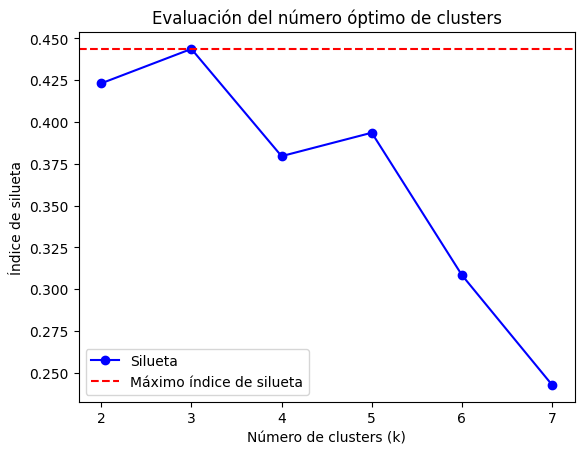

In [3]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

# Generar datos de ejemplo
X = [[2, 4], [3, 3], [3, 8], [4, 6], [6, 8], [7, 6], [8, 2], [8, 4], [9, 3], [10, 6]]

# Aplicar el algoritmo de agrupamiento K-means con diferentes valores de k
silhouette_scores = []
k_values = range(2, 8)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)  # Agrega n_init aquí
    kmeans.fit(X)
    labels = kmeans.labels_
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)

# Personalizar la gráfica
plt.plot(k_values, silhouette_scores, marker='o', linestyle='-', color='b', label='Silueta')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Índice de silueta')
plt.title('Evaluación del número óptimo de clusters')
plt.axhline(y=np.max(silhouette_scores), color='r', linestyle='--', label='Máximo índice de silueta')
plt.legend()
plt.show()

En el ejemplo anterior, se utiliza el algoritmo de agrupamiento K-means para agrupar los datos de ejemplo en diferentes valores de k. Se calcula el índice de silueta para cada valor de k utilizando `silhouette_score`. Luego, se grafican los valores del índice de silueta en función del número de clusters k. El objetivo es encontrar el valor de k que maximice el índice de silueta, lo cual indica una mejor separación y cohesión de los grupos.

* **Coeficiente de Rand ajustado (ARI):**

El coeficiente de Rand ajustado es una métrica que mide la similitud entre los agrupamientos obtenidos y los agrupamientos reales (etiquetas de clase conocidas). El valor del coeficiente de Rand ajustado varía de -1 a 1, donde 1 indica una coincidencia perfecta entre los agrupamientos y 0 indica una similitud aleatoria.

In [2]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

# Generar datos de ejemplo y etiquetas reales
X = [[2, 4], [3, 3], [3, 8], [4, 6], [6, 8], [7, 6], [8, 2], [8, 4], [9, 3], [10, 6]]
labels_true = [0, 0, 1, 1, 1, 1, 2, 2, 2, 2]

# Aplicar el algoritmo de agrupamiento K-means
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
labels_pred = kmeans.labels_

# Calcular el coeficiente de Rand ajustado
ari = adjusted_rand_score(labels_true, labels_pred)
print(f"Coeficiente de Rand ajustado: {ari}")

/home/puma/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Coeficiente de Rand ajustado: 0.6298472385428907


En este ejemplo, se utiliza el algoritmo de agrupamiento K-means para agrupar los datos de ejemplo. Se comparan los agrupamientos obtenidos con las etiquetas reales utilizando `adjusted_rand_score` para calcular el coeficiente de Rand ajustado. Un valor cercano a 1 indica una buena coincidencia entre los agrupamientos y las etiquetas reales.

Estas son solo algunas de las métricas comunes utilizadas para evaluar el rendimiento de los algoritmos de agrupamiento. La elección de la métrica adecuada depende del problema y de los datos específicos. Es importante considerar múltiples métricas y no basarse únicamente en una para tener una evaluación más completa del rendimiento del algoritmo de agrupamiento.

## **Reducción de dimensionalidad con PCA**

La Reducción de dimensionalidad con PCA (Análisis de Componentes Principales, por sus siglas en inglés) es una técnica utilizada para reducir la dimensionalidad de un conjunto de datos conservando la mayor cantidad posible de información. PCA transforma un conjunto de variables correlacionadas en un conjunto de variables no correlacionadas llamadas componentes principales.

Aquí tienes una explicación detallada junto con un ejemplo de código Python y gráficas:

* **Importar bibliotecas necesarias:**

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

* **Generar datos de ejemplo:**

In [4]:
np.random.seed(42)
# Crear una matriz de características con dos variables
X = np.random.rand(100, 2) * 10
# Agregar correlación entre las variables
X[:, 1] = X[:, 0] + np.random.rand(100) * 3

* **Aplicar PCA:**

In [5]:
# Crear una instancia de PCA
pca = PCA(n_components=2)
# Ajustar PCA a los datos
pca.fit(X)
# Obtener los componentes principales
components = pca.components_
# Obtener las varianzas explicadas por cada componente principal
explained_variance = pca.explained_variance_

* **Visualizar los datos y los componentes principales:**

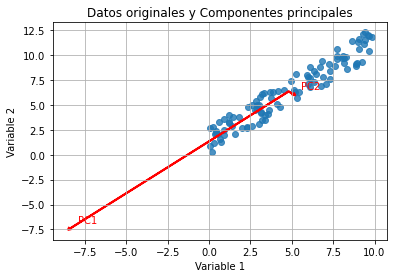

In [6]:
# Graficar los datos originales
plt.scatter(X[:, 0], X[:, 1], alpha=0.8)
plt.xlabel('Variable 1')
plt.ylabel('Variable 2')

# Graficar los componentes principales
for i, (comp, var) in enumerate(zip(components, explained_variance)):
    plt.arrow(pca.mean_[0], pca.mean_[1], comp[0] * var, comp[1] * var,
              head_width=0.2, head_length=0.2, linewidth=2, color='red')
    plt.text(pca.mean_[0] + comp[0] * var + 0.5, pca.mean_[1] + comp[1] * var + 0.5,
             f'PC{i+1}', color='red')

plt.title('Datos originales y Componentes principales')
plt.grid(True)
plt.show()

En el ejemplo anterior, se generan datos de ejemplo con dos variables correlacionadas. Luego, se aplica PCA utilizando la biblioteca scikit-learn. Los componentes principales y las varianzas explicadas se obtienen utilizando los atributos `components_` y `explained_variance_`, respectivamente. Finalmente, se grafican los datos originales y los componentes principales.

El gráfico muestra los datos originales y los componentes principales como flechas rojas. La longitud de las flechas indica la varianza explicada por cada componente principal. Los componentes principales apuntan en la dirección de máxima variabilidad de los datos, y la varianza explicada por cada componente indica cuánta información se conserva al proyectar los datos en ese componente.

La reducción de dimensionalidad con PCA se utiliza para simplificar la representación de datos y eliminar la correlación entre variables. Al seleccionar un número menor de componentes principales, es posible reducir la dimensionalidad del conjunto de datos mientras se conserva la mayor cantidad posible de información relevante. Esto puede ser útil para visualizar datos de alta dimensionalidad, reducir el costo computacional de algoritmos de aprendizaje automático o eliminar características redundantes.

![Reducción de dimensionalidad con PCA](../img/Reducci%C3%B3n%20de%20dimensionalidad%20con%20PCA.png "Reducción de dimensionalidad con PCA")

## **Algoritmo KMEANS**

El algoritmo K-means es un algoritmo de agrupamiento o clustering que divide un conjunto de datos en `K` grupos o clusters de manera no supervisada. El objetivo del algoritmo es encontrar `K` centroides que representen los grupos de manera óptima.

Aquí tienes una explicación detallada junto con un ejemplo de código Python y gráficas:

* **Importar bibliotecas necesarias:**

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

* **Generar datos de ejemplo:**

In [8]:
np.random.seed(42)
# Crear dos grupos de datos con distribución normal
X1 = np.random.randn(100, 2) + np.array([5, 5])
X2 = np.random.randn(100, 2) + np.array([-5, -5])
# Combinar los grupos en un solo conjunto de datos
X = np.concatenate((X1, X2))

* **Aplicar el algoritmo K-means:**

In [9]:
# Crear una instancia de KMeans con el número de clusters deseado
kmeans = KMeans(n_clusters=2)
# Ajustar KMeans a los datos
kmeans.fit(X)
# Obtener las etiquetas de cluster asignadas a cada punto de datos
labels = kmeans.labels_
# Obtener los centroides de cada cluster
centroids = kmeans.cluster_centers_

/home/puma/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


* **Visualizar los datos y los centroides:**

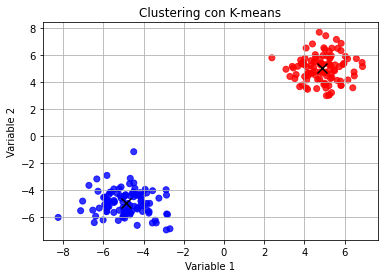

In [10]:
# Asignar colores a cada etiqueta de cluster
colors = ['red' if label == 0 else 'blue' for label in labels]

# Graficar los datos con colores según su cluster asignado
plt.scatter(X[:, 0], X[:, 1], c=colors, alpha=0.8)
# Graficar los centroides de cada cluster
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='x', s=100)

plt.xlabel('Variable 1')
plt.ylabel('Variable 2')
plt.title('Clustering con K-means')
plt.grid(True)
plt.show()

En el ejemplo anterior, se generan datos de ejemplo con dos grupos de datos con distribución normal. Luego, se aplica el algoritmo K-means utilizando la biblioteca scikit-learn. Se especifica el número de clusters deseado (`n_clusters=2`) y se ajusta el modelo a los datos. Las etiquetas de cluster asignadas a cada punto de datos se obtienen utilizando el atributo `labels_`, y los centroides de cada cluster se obtienen utilizando el atributo `cluster_centers_`.

El gráfico muestra los datos originales y los centroides de cada cluster. Los puntos de datos se agrupan según su cluster asignado y se les asigna un color correspondiente. Los centroides se representan como cruces negras. El objetivo del algoritmo K-means es minimizar la distancia entre los puntos de datos y el centroide de su cluster asignado.

El algoritmo K-means es ampliamente utilizado en el campo del aprendizaje automático y análisis de datos para agrupar datos no etiquetados en grupos homogéneos. Es un algoritmo rápido y eficiente, pero depende de la elección del número de clusters (K) y puede converger a óptimos locales dependiendo de la inicialización de los centroides.

![Algoritmo KMEANS](../img/Algoritmo%20KMEANS.png "Algoritmo KMEANS")

## **Algoritmo Jerárquico**

El algoritmo jerárquico es un algoritmo de agrupamiento o clustering que organiza los datos en una estructura jerárquica de forma similar a un árbol. Este enfoque no requiere especificar el número de clusters de antemano y puede ser utilizado para visualizar la estructura de los datos a diferentes niveles de granularidad.

Aquí tienes una explicación detallada junto con un ejemplo de código Python y gráficas:

* **Importar bibliotecas necesarias:**

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

* **Generar datos de ejemplo:**

In [12]:
np.random.seed(42)
# Crear dos grupos de datos con distribución normal
X1 = np.random.randn(100, 2) + np.array([5, 5])
X2 = np.random.randn(100, 2) + np.array([-5, -5])
# Combinar los grupos en un solo conjunto de datos
X = np.concatenate((X1, X2))

* **Aplicar el algoritmo jerárquico:**

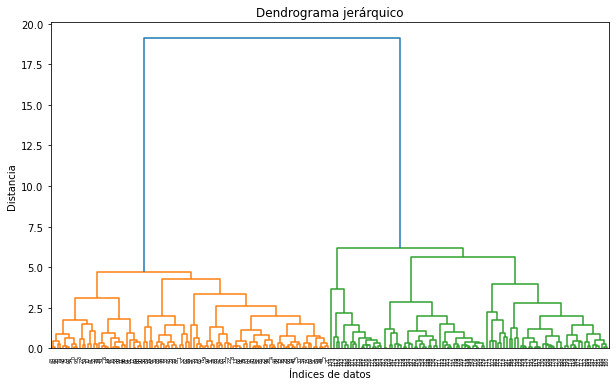

In [13]:
# Calcular la matriz de enlace utilizando el método de enlace completo
Z = linkage(X, method='complete')

# Graficar el dendrograma
plt.figure(figsize=(10, 6))
dendrogram(Z)
plt.xlabel('Índices de datos')
plt.ylabel('Distancia')
plt.title('Dendrograma jerárquico')
plt.show()

En el ejemplo anterior, se generan datos de ejemplo con dos grupos de datos con distribución normal. Luego, se aplica el algoritmo jerárquico utilizando la función linkage de la biblioteca `scipy.cluster.hierarchy`. El método de enlace completo (`method='complete'`) se utiliza para calcular la matriz de enlace, que representa las distancias entre los puntos de datos y los clusters en cada paso del algoritmo.

El dendrograma resultante muestra la estructura jerárquica de los datos. En el eje `x` se encuentran los índices de los datos y en el eje `y` se representa la distancia. La altura de cada fusión en el dendrograma indica la distancia entre los clusters que se están fusionando. La línea horizontal más larga sin ninguna fusión indica el número de clusters.

A partir del dendrograma, se puede elegir el número de clusters deseado cortando el dendrograma en una altura específica. Esta altura determinará el nivel de granularidad de los clusters. Por ejemplo, si se corta el dendrograma a una altura determinada, se obtendrán los clusters correspondientes a ese nivel.

El algoritmo jerárquico es útil cuando no se conoce el número óptimo de clusters de antemano o cuando se desea explorar la estructura de los datos a diferentes niveles de detalle. Sin embargo, puede ser computacionalmente más costoso que otros algoritmos de clustering, especialmente cuando se trabaja con grandes conjuntos de datos.

Es importante mencionar que existen diferentes métodos de enlace (por ejemplo, enlace simple, enlace completo, enlace promedio) que se pueden utilizar en el algoritmo jerárquico. Cada método puede dar lugar a estructuras de clusters diferentes, por lo que es recomendable experimentar con diferentes métodos para obtener los resultados deseados.

## **Algoritmo DBSCAN**

El algoritmo DBSCAN (Density-Based Spatial Clustering of Applications with Noise) es un algoritmo de agrupamiento o clustering que se basa en la densidad de los puntos de datos en el espacio para descubrir grupos de puntos cercanos. A diferencia de otros algoritmos de clustering, DBSCAN puede encontrar clusters de cualquier forma y es robusto a ruido y valores atípicos.

Aquí tienes una explicación detallada junto con un ejemplo de código Python y gráficas:

* **Importar bibliotecas necesarias:**

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

* **Generar datos de ejemplo:**

In [15]:
np.random.seed(42)
# Crear tres grupos de datos con distribución normal
X1 = np.random.randn(100, 2) + np.array([5, 5])
X2 = np.random.randn(100, 2) + np.array([-5, -5])
X3 = np.random.randn(50, 2) + np.array([0, 0])
# Combinar los grupos en un solo conjunto de datos
X = np.concatenate((X1, X2, X3))

* **Aplicar el algoritmo DBSCAN:**

In [16]:
# Crear el objeto DBSCAN y especificar los parámetros
dbscan = DBSCAN(eps=0.5, min_samples=5)

# Aplicar el algoritmo DBSCAN al conjunto de datos
labels = dbscan.fit_predict(X)

En el ejemplo anterior, se generan datos de ejemplo con tres grupos de datos con distribución normal y se combinan en un solo conjunto de datos. Luego, se aplica el algoritmo `DBSCAN` utilizando la clase `DBSCAN` de la biblioteca `sklearn.cluster`. Se especifican dos parámetros importantes: `eps` y `min_samples`. `eps` define la distancia máxima entre dos puntos para que se consideren vecinos y `min_samples` define el número mínimo de puntos vecinos requeridos para formar un cluster. Estos parámetros deben ser ajustados según las características de los datos.

Después de aplicar el algoritmo `DBSCAN`, se obtienen las etiquetas de cluster asignadas a cada punto de datos. Los puntos asignados a un mismo cluster tienen la misma etiqueta, mientras que los puntos considerados como ruido o outliers se les asigna la etiqueta -1.

* **Visualizar los resultados:**

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

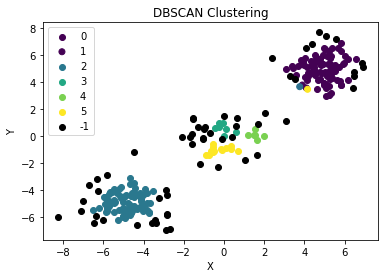

In [18]:
# Obtener la cantidad de clusters encontrados (excluyendo los puntos de ruido)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

# Create a colormap for visualizing the clusters
colormap = plt.cm.get_cmap('viridis', n_clusters)

# Plot the data points with colors based on their cluster labels
for label in set(labels):
    if label == -1:
        # Noise points in black color
        color = 'k'
    else:
        # Assign a color from the colormap based on the cluster label
        color = colormap(label)
    # Filter the data points by their cluster label
    mask = labels == label
    plt.scatter(X[mask, 0], X[mask, 1], c=color, label=label)

plt.xlabel('X')
plt.ylabel('Y')
plt.title('DBSCAN Clustering')
plt.legend()
plt.show()

En el código anterior, se obtiene la cantidad de clusters encontrados (excluyendo los puntos de ruido) y se crea una matriz de colores para visualizar los clusters. Luego, se grafican los puntos de datos asignando colores según sus etiquetas de cluster. Los puntos de ruido se representan en color negro.

El algoritmo DBSCAN es particularmente útil cuando se trabaja con conjuntos de datos donde los clusters tienen diferentes densidades o formas irregulares. El algoritmo puede encontrar clusters de cualquier forma y es robusto a la presencia de ruido y valores atípicos. Sin embargo, la elección adecuada de los parámetros `eps` y `min_samples` es importante y puede requerir ajustes y experimentación para obtener resultados óptimos.

| **Inicio** | **atrás 2** | **Siguiente 4** |
|----------- |-------------- |---------------|
| [🏠](../../../README.md) | [⏪](./2.ALGORITMOS_DE_CLASIFICACION.ipynb)| [⏩](./4.METODOS_AVANZADOS_PARA_MACHINE_LEARNING.ipynb)|